# Practice materials

This notebook can be used to hone your Python skills or get some extra practice. To get the most out of this notebook, first try to make each exercise by yourself. If you really get stuck, solutions are provided at the bottom of the notebook.



**1. Array slicing, editing, etc**

a) Make an array running from 10 to 1200 (exclusive) in steps of 10. 

b) Use this array make a new array consisting of the elements with value 20, 40, 60 and 80.

c) Make an array using the first array, running backwards from 1190 to 10 (include).

d) Calculate the average value of this array without using the numpy funcion average or mean.

e) Merge the arrays from question 1a and 1c, and sort that array.

f) Each value appears twice in this new array. Get rid of these double values so that you end up with the array of question 1a.

In [ ]:
# Your code

**2. Math**

a) Create an array consisting of $10^3$ uniform random elements between -10 and 10.

b) Calculate the average value of these numbers as function of N (the number of elements). ($\mu(N) = \sum_{i=0}^N \frac{x_i}{N}$). Plot the average as function of N. 

c) Calculate the difference between the average and new average as function of N ($\Delta\mu(N)=\mu(N+1)-\mu(N)$). Plot this difference using a log-log scale.

d) The hypothesis is that the maximum value of the difference can be described by $\max=\frac{10}{N}$ and the minimum value $\min=\frac{10}{N^2}$. Investigate this hypothesis.

In [ ]:
# Your code

**3. Monte Carlo**

One wants to know how important the sample size is when using a monte-carlo simulation. To test this, one tries to calculate the area of a circle using a varying number of random points.

a) Use a monte-carlo simulation to determine the area of a circle with a radius of r=1m using N=1000 random points

b) Calculate the average (absolute) error of the monte-carlo simulations when using N=1000 random points over 100 simulations

c) Plot the difference between the monte-carlo estimate and the actual area of a circle as a function of the number of points. Make sure to average the error at each sample size over 100 simulations to reduce noise.





In [ ]:
# a)
N = 1000

random_x = ...
random_y = ...

...


In [ ]:
# b)

In [ ]:
# c)

sample_sizes = np.arange(1, 200, 5, dtype=int)

**4. Plots and curvefits**

**Solutions to exercises**

Only use these to check your answers or if you really get stuck!

In [ ]:
### Exercise 1

### BEGIN_SOLUTION
import numpy as np

array_a = np.arange(10,1200,10)
print(array_a)

array_b = array_a[1:9:2]
print(array_b) 

array_c = array_a[::-1]
print(array_c)

av_d = sum(array_c)/len(array_c)
print(av_d)

array_e = np.sort(np.concatenate((array_a,array_c)))
print(array_e)

array_f = array_e[::2]
print(array_f)
### END_SOLUTION

c:\Users\alekh\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\alekh\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


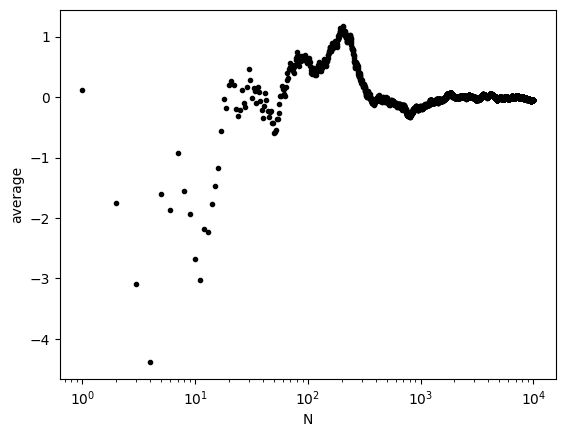

C:\Users\alekh\AppData\Local\Temp\ipykernel_24188\3291483513.py:23: RuntimeWarning: divide by zero encountered in divide
  y = 10/x
C:\Users\alekh\AppData\Local\Temp\ipykernel_24188\3291483513.py:29: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x,10/x**2,'b--')


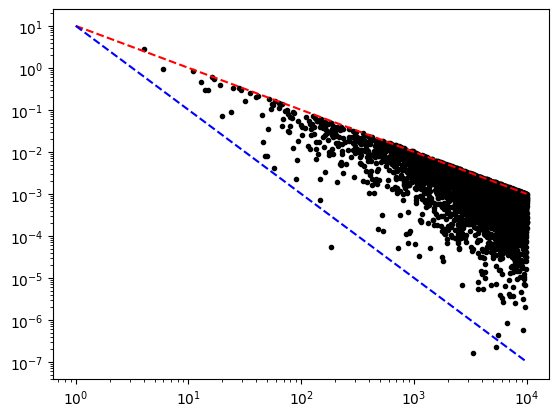

In [9]:
### Exercise 2

### BEGIN_SOLUTION
import numpy as np
import matplotlib.pyplot as plt

array_uni = np.random.uniform(-10,10,int(1e4))

array_average = np.array([])
for i in range(len(array_uni)):
    array_average = np.append(array_average,np.mean(array_uni[:i]))

plt.figure()
plt.plot(array_average,'k.')
plt.xlabel('N')
plt.ylabel('average')
plt.xscale('log')
plt.show()

difference_average = array_average[1:]-array_average[:-1]

x = np.arange(0,1e4)
y = 10/x


plt.figure()
plt.plot(difference_average,'k.')
plt.plot(x,y,'r--')
plt.plot(x,10/x**2,'b--')
plt.yscale('log')
plt.xscale('log')
plt.show()
### END_SOLUTION

In [ ]:
### Exercise 3

### BEGIN SOLUTION 
import numpy as np
import matplotlib.pyplot as plt

# a)
N = 1000

random_x = np.random.uniform(-1, 1, N)
random_y = np.random.uniform(-1, 1, N)

count = 0
for i in range(N):
    if random_x[i]**2 + random_y[i]**2 <= 1:
        count += 1
        
print(4 * count/N)

## of

count = sum(random_x**2 + random_y**2 <= 1)
print(4 * count/N)

# b)

errors = np.array([])
for k in range(100):
    random_x = np.random.uniform(-1, 1, N)
    random_y = np.random.uniform(-1, 1, N)
    
    count = sum(random_x**2 + random_y**2)
    estimate = 4*count/N
    error = np.abs(np.pi-estimate)
    errors = np.append(errors, error)
print(np.mean(errors))
    
# c)
mean_errors = np.array([])
sample_sizes = np.arange(1, 100, 5, dtype=int)

for N in sample_sizes:
    
    errors = np.array([])
    for k in range(100):
        random_x = np.random.uniform(-1, 1, N)
        random_y = np.random.uniform(-1, 1, N)
                
        count = sum(random_x**2 + random_y**2 <= 1)

        estimate = 4*count/N
        errors = np.append(errors, (np.abs(np.pi - estimate)))
        
        
    mean_errors = np.append(mean_errors, np.mean(errors))

plt.plot(sample_sizes, mean_errors, ".")
plt.xlabel("Sample size")
plt.ylabel("Mean error")
### END SOLUTION